# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key="659374877bea205be7d6b0590c1a3368"
print(weather_api_key)

659374877bea205be7d6b0590c1a3368


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#test_df=citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#print(test_df)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [42]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=659374877bea205be7d6b0590c1a3368&units=imperial&q=


In [50]:
name=[]
cloud=[]
date=[]
humid=[]
lat = []
longi=[] 
temp = []
wind=[]
count=0

#Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        longi.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        count= count+1
        print(f'The city {city} is number {count}')
    except(KeyError):
        print(f"The city {city} information was not found")

    
    

The city guerrero negro is number 1
The city san juan is number 2
The city muravlenko is number 3
The city qaanaaq is number 4
The city kozan is number 5
The city kaeo is number 6
The city saint george is number 7
The city busselton is number 8
The city yeroham is number 9
The city tiksi is number 10
The city saleaula information was not found
The city moncton is number 11
The city russellville is number 12
The city vila franca do campo is number 13
The city eureka is number 14
The city butaritari is number 15
The city klaksvik is number 16
The city talnakh is number 17
The city ushuaia is number 18
The city punta arenas is number 19
The city uni is number 20
The city pangnirtung is number 21
The city bitung is number 22
The city meyungs information was not found
The city bredasdorp is number 23
The city mar del plata is number 24
The city zarubino is number 25
The city barentsburg information was not found
The city ostrovnoy is number 26
The city albany is number 27
The city hithadhoo

The city bestobe is number 225
The city ulaanbaatar is number 226
The city nizhneyansk information was not found
The city nikolskoye is number 227
The city kathu is number 228
The city oranjestad is number 229
The city taoudenni is number 230
The city zaraza is number 231
The city dauphin is number 232
The city dakar is number 233
The city adrar is number 234
The city alamosa is number 235
The city paredon is number 236
The city dossor is number 237
The city nouakchott is number 238
The city havoysund is number 239
The city bathsheba is number 240
The city kautokeino is number 241
The city sobolevo is number 242
The city one hundred mile house information was not found
The city mabaruma is number 243
The city hirara is number 244
The city tabiauea information was not found
The city bogatynia is number 245
The city primorsk is number 246
The city atar is number 247
The city cherskiy is number 248
The city chagda information was not found
The city panorama is number 249
The city attawapi

The city luban is number 447
The city douglas is number 448
The city olafsvik is number 449
The city cherdyn is number 450
The city rodrigues alves is number 451
The city makakilo city is number 452
The city yaqui is number 453
The city vangaindrano is number 454
The city puerto del rosario is number 455
The city vreed en hoop information was not found
The city shelburne is number 456
The city antalaha is number 457
The city taybad is number 458
The city kattivakkam is number 459
The city kendari is number 460
The city san jose is number 461
The city changtu is number 462
The city xining is number 463
The city edd is number 464
The city mahajanga is number 465
The city manado is number 466
The city khandyga is number 467
The city yulara is number 468
The city yurya information was not found
The city kalabo is number 469
The city belle glade is number 470
The city evensk is number 471
The city olga is number 472
The city ulladulla is number 473
The city rayevskiy is number 474
The city 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
print(len(cloud))
print(len(date))
print(len(humid))
print(len(name))

553
553
553
553


In [56]:
city_dict= {
    "City": name,
    'Cloudiness': cloud,
    "Date":date,
    "Humidity":humid,
    "Latitude":lat,
    "Longitude":longi,
    "Max Temperature":temp,
    "Wind Speed":wind,
}
city_df= pd.DataFrame(city_dict)
city_df

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Guerrero Negro,0,1587258069,61,27.98,-114.06,63.99,21.45
1,San Juan,0,1587258143,30,-31.54,-68.54,75.94,1.01
2,Muravlenko,100,1587258143,90,63.79,74.52,39.58,16.11
3,Qaanaaq,100,1587258144,88,77.48,-69.36,21.69,19.26
4,Kozan,23,1587258144,100,37.46,35.82,57.31,4.70
...,...,...,...,...,...,...,...,...
548,San,98,1587258002,19,13.30,-4.90,94.66,8.01
549,Paita,4,1587258258,68,-5.09,-81.11,75.90,11.45
550,San-Pédro,100,1587258258,86,4.75,-6.64,79.59,9.24
551,Port Pirie,25,1587258258,72,-33.18,138.02,64.40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

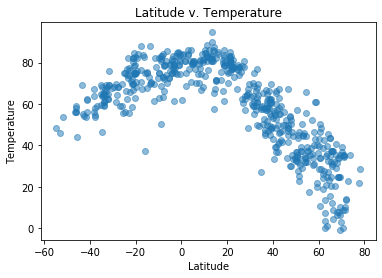

In [79]:
x_temp = city_df['Latitude']
y_temp = city_df['Max Temperature']
plt.scatter(x_temp, y_temp, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude v. Temperature')
plt.savefig("temp")
plt.show()



#### Latitude vs. Humidity Plot

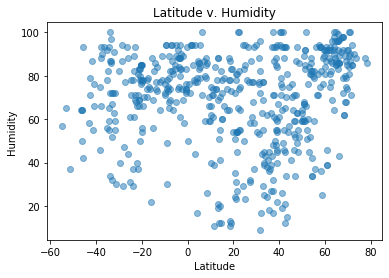

In [80]:
x_hum = city_df['Latitude']
y_hum = city_df['Humidity']
plt.scatter(x_hum, y_hum, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude v. Humidity')
plt.savefig("humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

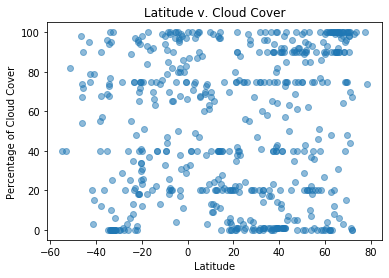

In [81]:
x_cloud = city_df['Latitude']
y_cloud = city_df['Cloudiness']
plt.scatter(x_cloud, y_cloud, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Percentage of Cloud Cover')
plt.title('Latitude v. Cloud Cover')
plt.savefig("Cloud")
plt.show()

#### Latitude vs. Wind Speed Plot

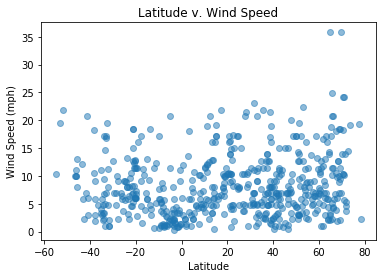

In [78]:
x_wind = city_df['Latitude']
y_wind = city_df['Wind Speed']
plt.scatter(x_wind, y_wind, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude v. Wind Speed')
plt.savefig("wind")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [92]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df["Latitude"] > 0]
south_df = city_df[city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [97]:
x_temp_n=north_df['Latitude']
y_temp_n=north_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_temp_n,y_temp_n)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_temp_n * slope + intercept
print(regress_values)

y = -0.97x +91.65
0      64.463001
2      29.673412
3      16.373511
4      55.253135
6      55.602876
         ...    
545    78.569251
547    54.689662
548    78.724691
550    87.031058
552    26.982344
Name: Latitude, Length: 378, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (378,) and (175,)

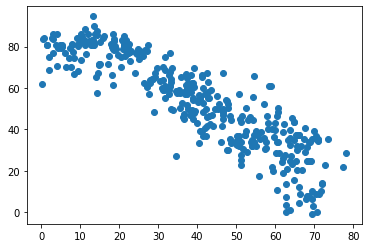

In [104]:
plt.scatter(x_temp_n,y_temp_n)
plt.plot(x_temp_n,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Maximum Temperature in the Northern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [100]:
x_temp_s=south_df['Latitude']
y_temp_s=south_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_temp_s,y_temp_s)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_temp_s * slope + intercept
print(regress_values)

y = 0.51x +80.92
1      64.800193
5      62.981130
7      63.722040
17     52.914964
18     53.758069
         ...    
539    70.645723
542    69.536912
546    78.259219
549    78.315426
551    63.962198
Name: Latitude, Length: 175, dtype: float64


The r-squared is: 0.48164658042708486


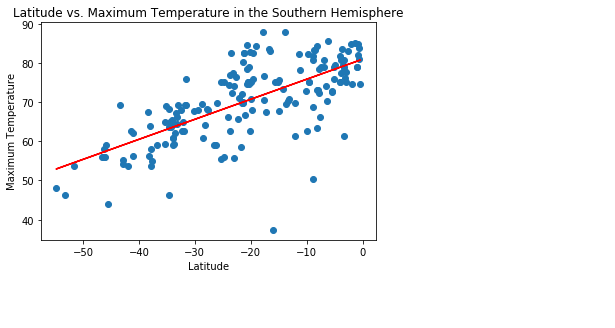

In [102]:
plt.scatter(x_temp_s,y_temp_s)
plt.plot(x_temp_s,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Maximum Temperature in the Southern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [107]:
x_hum_n=north_df['Latitude']
y_hum_n=north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum_n,y_hum_n)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_hum_n * slope + intercept
print(regress_values)

y = 0.3x +56.78
0      65.091247
2      75.730596
3      79.797971
4      67.907807
6      67.800849
         ...    
545    60.777274
547    68.080129
548    60.729737
550    58.189485
552    76.553579
Name: Latitude, Length: 378, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (378,) and (175,)

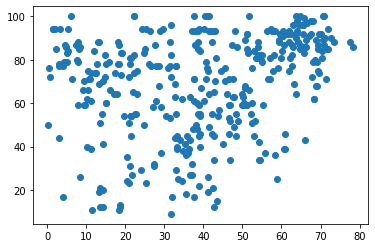

In [111]:
plt.scatter(x_hum_n,y_hum_n)
plt.plot(x_hum_n,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Humidity in the Northern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [109]:
x_hum_s=south_df['Latitude']
y_hum_s=south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum_s,y_hum_s)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_hum_s * slope + intercept
print(regress_values)

y = 0.32x +79.29
1      69.152348
5      68.008589
7      68.474446
17     61.679362
18     62.209475
         ...    
539    72.827797
542    72.130618
546    77.614877
549    77.650218
551    68.625447
Name: Latitude, Length: 175, dtype: float64


The r-squared is: 0.06829167055555009


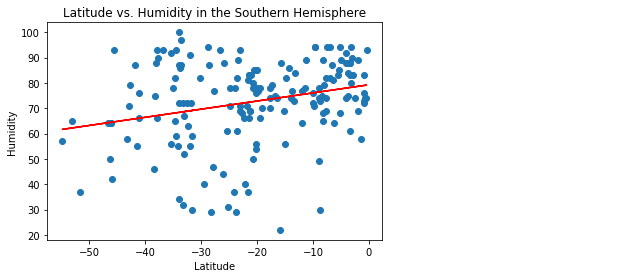

In [110]:
plt.scatter(x_hum_s,y_hum_s)
plt.plot(x_hum_s,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Humidity in the Southern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [112]:
x_cloud_n=north_df['Latitude']
y_cloud_n=north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cloud_n,y_cloud_n)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_cloud_n * slope + intercept
print(regress_values)

y = 0.3x +56.78
0      65.091247
2      75.730596
3      79.797971
4      67.907807
6      67.800849
         ...    
545    60.777274
547    68.080129
548    60.729737
550    58.189485
552    76.553579
Name: Latitude, Length: 378, dtype: float64


The r-squared is: 0.06993110317292671


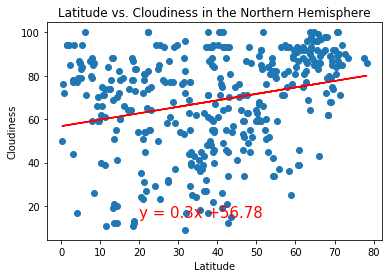

In [113]:
plt.scatter(x_cloud_n,y_cloud_n)
plt.plot(x_cloud_n,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness in the Northern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [114]:
x_cloud_s=south_df['Latitude']
y_cloud_s=south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cloud_s,y_cloud_s)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_cloud_s * slope + intercept
print(regress_values)

y = 0.32x +79.29
1      69.152348
5      68.008589
7      68.474446
17     61.679362
18     62.209475
         ...    
539    72.827797
542    72.130618
546    77.614877
549    77.650218
551    68.625447
Name: Latitude, Length: 175, dtype: float64


The r-squared is: 0.06829167055555009


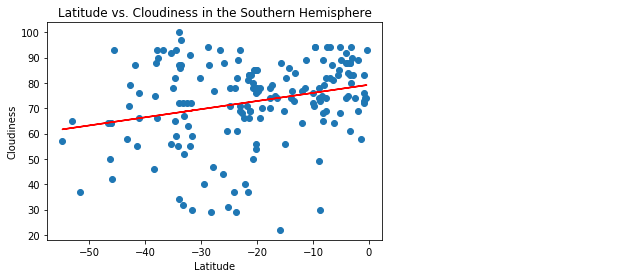

In [115]:
plt.scatter(x_cloud_s,y_cloud_s)
plt.plot(x_cloud_s,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness in the Southern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [116]:
x_wind_n=north_df['Latitude']
y_wind_n=north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind_n,y_wind_n)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_wind_n * slope + intercept
print(regress_values)

y = 0.04x +7.22
0       8.265051
2       9.608921
3      10.122676
4       8.620815
6       8.607305
         ...    
545     7.720148
547     8.642581
548     7.714143
550     7.393281
552     9.712873
Name: Latitude, Length: 378, dtype: float64


The r-squared is: 0.018133697100371594


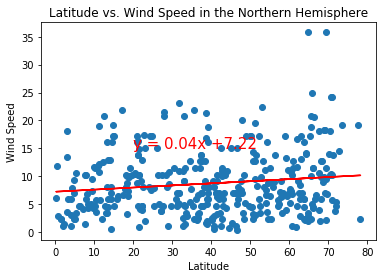

In [117]:
plt.scatter(x_wind_n,y_wind_n)
plt.plot(x_wind_n,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed in the Northern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [118]:
x_wind_s=south_df['Latitude']
y_wind_s=south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind_s,y_wind_s)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_wind_s * slope + intercept
print(regress_values)

y = -0.14x +4.14
1       8.453309
5       8.939880
7       8.741698
17     11.632423
18     11.406906
         ...    
539     6.889720
542     7.186310
546     4.853228
549     4.838194
551     8.677460
Name: Latitude, Length: 175, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (378,) and (175,)

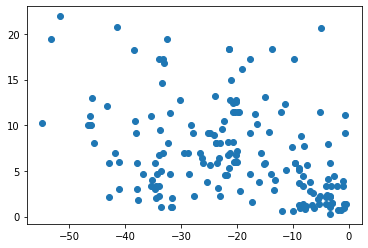

In [121]:
plt.scatter(x_wind_s,y_wind_s)
plt.plot(x_wind_n,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed in the Southern Hemisphere")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [122]:
city_df.to_csv("weatherpy.csv")
city_df.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Guerrero Negro,0,1587258069,61,27.98,-114.06,63.99,21.45
1,San Juan,0,1587258143,30,-31.54,-68.54,75.94,1.01
2,Muravlenko,100,1587258143,90,63.79,74.52,39.58,16.11
3,Qaanaaq,100,1587258144,88,77.48,-69.36,21.69,19.26
4,Kozan,23,1587258144,100,37.46,35.82,57.31,4.70
